## **<span style="color:rgb(223, 9, 9);">[CA2: Gradient & Newton]</span>**

**<span style="color:rgb(255, 255, 0);">[AhmadReza Nopoush, id=610301194]</span>**

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### **<span style="color:rgb(0, 255, 0);">[Problem 1]</span>**

we are given the function:

$$ f(x) = x_1^4 + x_1 + 3x_2^2 $$

#### **<span style="color:rgb(0, 255, 255);">[part a]</span>**

we define these functions to calculate Gradient and Hessian.

In [2]:
def Gradient(func, fact):
    grad = [sp.diff(func,x) for x in fact]
    return grad

def Hessian(func, fact):
    hessi = sp.hessian(func, fact)
    return hessi


Now, we define $ f(x) $

In [3]:
X = sp.symbols('x1 x2')
F_x = (X[0] + 3*X[1]**2 + X[0]**4)
F_x

x1**4 + x1 + 3*x2**2

we can see gradient and hessian of $ f(x) $:

In [4]:
Gradient(F_x,X)

[4*x1**3 + 1, 6*x2]

In [5]:
Hessian(F_x, X)

Matrix([
[12*x1**2, 0],
[       0, 6]])

#### **<span style="color:rgb(0, 255, 255);">[part b]</span>**

this is implementation of greadient method with backtracking line search.

In [6]:
def Gradient_Backtack_Method(func, factor, x0, s, alpha, beta, epsilon):
    grad_f = Gradient(func, factor)

    def Gradient_val(grad, fact, x):
        p = [(fact[i],x[i]) for i in range(len(x))]
        return np.array([float(grad[i].subs(p)) for i in range(len(grad))])
    
    def Function_val(func, fact, x):
        return float(func.subs([(factor[i],x[i]) for i in range(len(fact))]))


    curr = np.array([float(xi) for xi in x0])
    func_val = func.subs([(factor[i],curr[i]) for i in range(len(curr))])
    
    history = [curr.copy()]
    Function_values = []

    for iter in range(1,10000):
        grad_val = Gradient_val(grad_f,factor,curr)
        grad_norm  = np.linalg.norm(grad_val)
        print(f"Iteration {iter}: x = {curr}, grad = {grad_val}, norm = {grad_norm}")
        if grad_norm < epsilon:
            break

        func_val = Function_val(func,factor,curr)
        t = s
        Function_values.append(func_val)
        while func_val - Function_val(func,factor,curr - t*grad_val) < alpha * t * grad_norm**2:
            t *= beta
        curr -= (t*grad_val)
        history.append(curr.copy())

    return history, Function_values

In [7]:
def plot_optimization_path(history, func, factor):
    x_vals = np.linspace(-0.8, 0.2, 200)
    y_vals = np.linspace(-0.5, 0.5, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.array([
        float(func.subs({factor[0]: x, factor[1]: y}))
        for x, y in zip(np.ravel(X), np.ravel(Y))
    ]).reshape(X.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    path = np.array(history)
    plt.plot(path[:, 0], path[:, 1], 'ro--', label='Optimization Path')
    plt.scatter(path[0, 0], path[0, 1], color='green', label='Start')
    plt.scatter(path[-1, 0], path[-1, 1], color='red', label='End')
    plt.title('Gradient Descent with Backtracking Line Search')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_function_values(gradient_norms):
    plt.figure(figsize=(8, 5))
    plt.plot(gradient_norms, 'b-o', label='Function value')
    plt.xlabel('Iteration')
    plt.ylabel('value of function')
    plt.title('Function values Decrease Over Iterations')
    plt.grid(True)
    plt.legend()
    plt.show()


Iteration 1: x = [5. 4.], grad = [501.  24.], norm = 501.5745208839859
Iteration 2: x = [2.04261799 3.85832901], grad = [35.08956419 23.14997403], norm = 42.0380638527698
Iteration 3: x = [-0.3687185  2.2674749], grad = [ 0.79948597 13.60484942], norm = 13.628319983721843
Iteration 4: x = [-0.50284999 -0.01504007], grad = [ 0.49140121 -0.09024042], norm = 0.4996183391315829
Iteration 5: x = [-0.63166787  0.00861591], grad = [-0.00815276  0.05169549], norm = 0.052334416289177114
Iteration 6: x = [-6.30300060e-01 -5.71490186e-05], grad = [-0.00161781 -0.00034289], norm = 0.0016537443327409435
Iteration 7: x = [-6.29960781e-01  1.47610886e-05], grad = [-1.22116596e-06  8.85665315e-05], norm = 8.85749499230169e-05
Iteration 8: x = [-6.29960576e-01 -9.79097102e-08], grad = [-2.45496487e-07 -5.87458261e-07], norm = 6.366912389148693e-07
Iteration 9: x = [-6.29960535e-01  6.49431191e-10], grad = [-4.93533399e-08  3.89658715e-09], norm = 4.950692422948452e-08


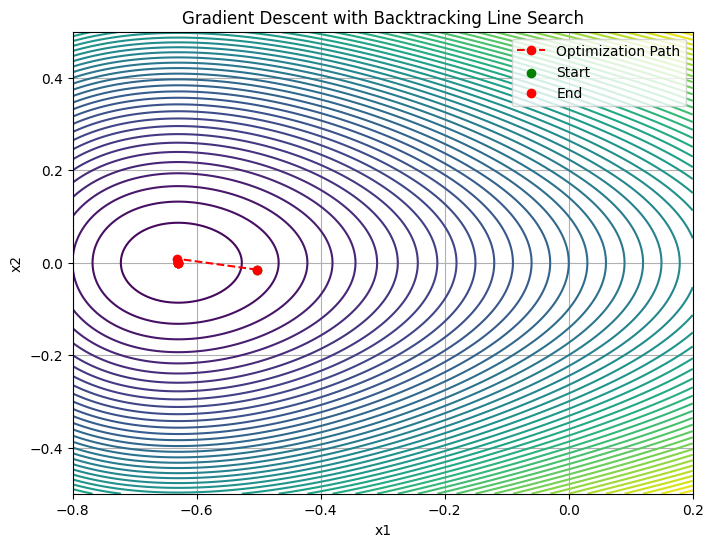

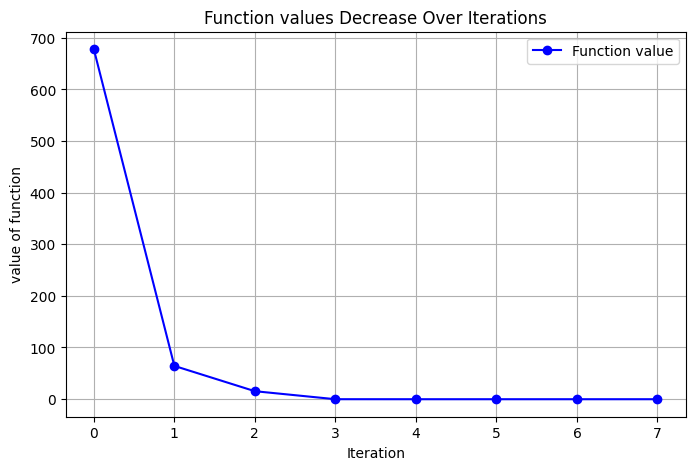

In [8]:
x1, x2 = sp.symbols('x1 x2')
f = x1 + 3*x2**2 + x1**4
x0 = [5.0, 4.0]
history, grad_norms = Gradient_Backtack_Method(f, [x1, x2], x0, s=1.0, alpha=0.4, beta=0.8, epsilon=1e-7)
plot_optimization_path(history[3:], f, [x1, x2])
plot_function_values(grad_norms)

#### **<span style="color:rgb(0, 255, 255);">[part c]</span>**

In [9]:
alphas = [0.1*i for i in range(1,10)]
betas = [0.1*i for i in range(1,10)]

results = {}
for a in alphas:
    for b in betas:
        path,_ = Gradient_Backtack_Method(f, [x1, x2], x0, s=1.0, alpha=a, beta=b, epsilon=1e-5)
        results[(a, b)] = len(path)

results  # Shows number of iterations per (alpha, beta)


Iteration 1: x = [5. 4.], grad = [501.  24.], norm = 501.5745208839859
Iteration 2: x = [-0.01  3.76], grad = [ 0.999996 22.56    ], norm = 22.582152067507117
Iteration 3: x = [-0.1099996  1.504    ], grad = [0.99467606 9.024     ], norm = 9.07865389033623
Iteration 4: x = [-0.20946721  0.6016    ], grad = [0.96323724 3.6096    ], norm = 3.7359119556551357
Iteration 5: x = [-0.30579093  0.24064   ], grad = [0.88562429 1.44384   ], norm = 1.693813547835743
Iteration 6: x = [-0.39435336  0.096256  ], grad = [0.75468922 0.577536  ], norm = 0.9503176612222409
Iteration 7: x = [-0.46982228  0.0385024 ], grad = [0.58517892 0.2310144 ], norm = 0.62912798284188
Iteration 8: x = [-0.52834017  0.01540096], grad = [0.41006944 0.09240576], norm = 0.4203519596347
Iteration 9: x = [-0.56934712  0.00616038], grad = [0.26177054 0.0369623 ], norm = 0.26436722520300276
Iteration 10: x = [-0.59552417  0.00246415], grad = [0.1551917  0.01478492], norm = 0.15589437837412126
Iteration 11: x = [-0.61104334  

{(0.1, 0.1): 26,
 (0.1, 0.2): 12,
 (0.1, 0.30000000000000004): 44,
 (0.1, 0.4): 11,
 (0.1, 0.5): 24,
 (0.1, 0.6000000000000001): 16,
 (0.1, 0.7000000000000001): 21,
 (0.1, 0.8): 29,
 (0.1, 0.9): 41,
 (0.2, 0.1): 26,
 (0.2, 0.2): 12,
 (0.2, 0.30000000000000004): 26,
 (0.2, 0.4): 12,
 (0.2, 0.5): 24,
 (0.2, 0.6000000000000001): 15,
 (0.2, 0.7000000000000001): 20,
 (0.2, 0.8): 29,
 (0.2, 0.9): 25,
 (0.30000000000000004, 0.1): 32,
 (0.30000000000000004, 0.2): 12,
 (0.30000000000000004, 0.30000000000000004): 23,
 (0.30000000000000004, 0.4): 14,
 (0.30000000000000004, 0.5): 17,
 (0.30000000000000004, 0.6000000000000001): 15,
 (0.30000000000000004, 0.7000000000000001): 9,
 (0.30000000000000004, 0.8): 13,
 (0.30000000000000004, 0.9): 17,
 (0.4, 0.1): 29,
 (0.4, 0.2): 14,
 (0.4, 0.30000000000000004): 29,
 (0.4, 0.4): 15,
 (0.4, 0.5): 17,
 (0.4, 0.6000000000000001): 13,
 (0.4, 0.7000000000000001): 10,
 (0.4, 0.8): 8,
 (0.4, 0.9): 12,
 (0.5, 0.1): 32,
 (0.5, 0.2): 21,
 (0.5, 0.30000000000000004):

In [10]:
m = np.inf
best_ab = None
for k,v in results.items():
    if v<m:
        m = v
        best_ab = k 
print(m, best_ab)


8 (0.4, 0.8)


as we can see the minimum iteration is 8 with alpha = 0.4 and beta = 0.8

#### **<span style="color:rgb(0, 255, 255);">[part d]</span>**

In [11]:
def Pure_Newton_Method(func, factor, x0, epsilon):
    grad_f = Gradient(func, factor)
    hessian_f = Hessian(func,factor)

    def Gradient_val(grad, fact, x):
        p = [(fact[i],x[i]) for i in range(len(x))]
        return np.array([float(grad[i].subs(p)) for i in range(len(grad))])
    
    def Function_val(func, fact, x):
        return float(func.subs([(factor[i],x[i]) for i in range(len(fact))]))
    
    def Hessian_val(hess, fact, x):
        p = [(fact[i],x[i]) for i in range(len(x))]
        return np.array(hess.subs(p),dtype=float)


    curr = np.array(x0, dtype=float)
    history = [curr.copy()]
    Function_values = []

    for iter in range(1,100):
        grad_val = Gradient_val(grad_f,factor,curr)
        grad_norm  = np.linalg.norm(grad_val)
        func_val = Function_val(func,factor,curr)
        print(f"Iteration {iter}: x = {curr}, value = {func_val}, norm = {grad_norm}")
        if grad_norm < epsilon:
            break

        
        hessian = Hessian_val(hessian_f, factor, curr)
        delta = np.linalg.solve(hessian, grad_val)
        curr -= (delta)
        history.append(curr.copy())
        Function_values.append(func_val)

    return history, Function_values

Iteration 1: x = [5. 4.], value = 678.0, norm = 501.5745208839859
Iteration 2: x = [3.33 0.  ], value = 126.29370321, norm = 148.704148
Iteration 3: x = [2.21248498 0.        ], value = 26.174388887970863, norm = 44.32125036691006
Iteration 4: x = [1.45796612 0.        ], value = 5.976418731045175, norm = 13.396591490789467
Iteration 5: x = [0.932774 0.      ], value = 1.689791173138593, norm = 4.246304767333987
Iteration 6: x = [0.52607131 0.        ], value = 0.602662433721537, norm = 1.5823630825323005
Iteration 7: x = [0.04960119 0.        ], value = 0.04960724479854919, norm = 1.000488130929943
Iteration 8: x = [-33.83844036   0.        ], value = 1311082.8680271984, norm = 154984.47718350316
Iteration 9: x = [-22.55903302   0.        ], value = 258966.79914369722, norm = 45921.067315064385
Iteration 10: x = [-15.03951909   0.        ], value = 51145.58030854991, norm = 13605.982913006363
Iteration 11: x = [-10.02671449   0.        ], value = 10097.260199423683, norm = 4031.143101

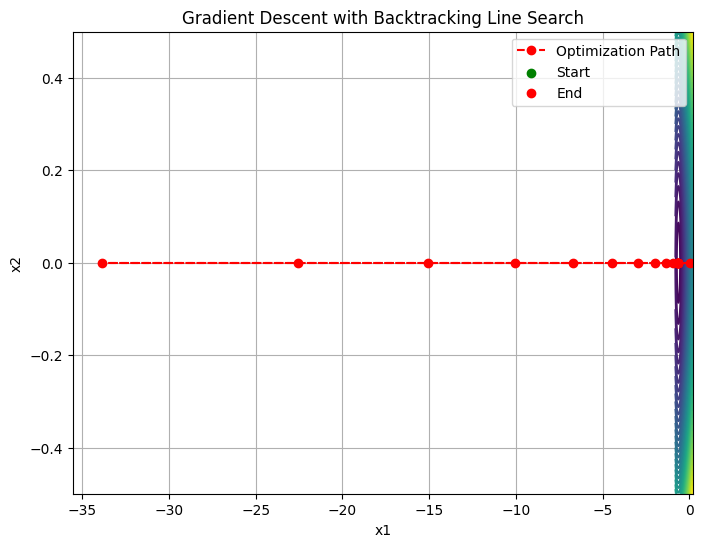

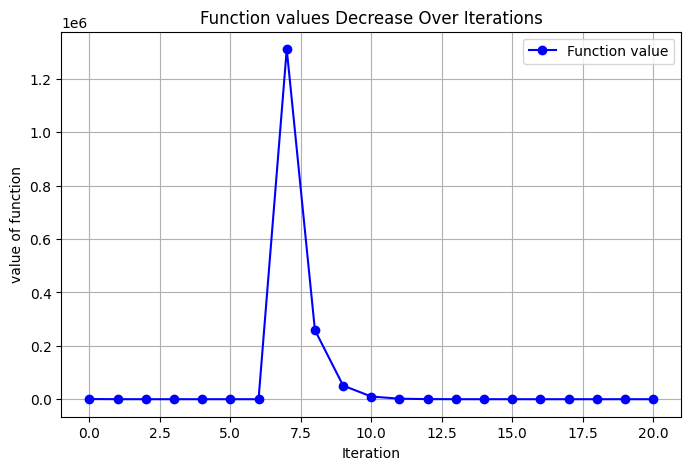

In [12]:
x1, x2 = sp.symbols('x1 x2')
f = x1 + 3*x2**2 + x1**4
x0 = [5.0, 4.0]
history, grad_norms = Pure_Newton_Method(f, [x1, x2], x0, epsilon=1e-7)
plot_optimization_path(history[6:], f, [x1, x2])
plot_function_values(grad_norms)

#### **<span style="color:rgb(0, 255, 255);">[part e]</span>**

In [13]:
def Backtrack_Newton_Method(func, factor, x0, s, alpha, beta, epsilon):
    grad_f = Gradient(func, factor)
    hessian_f = Hessian(func,factor)

    def Gradient_val(grad, fact, x):
        p = [(fact[i],x[i]) for i in range(len(x))]
        return np.array([float(grad[i].subs(p)) for i in range(len(grad))])
    
    def Function_val(func, fact, x):
        return float(func.subs([(factor[i],x[i]) for i in range(len(fact))]))
    
    def Hessian_val(hess, fact, x):
        p = [(fact[i],x[i]) for i in range(len(x))]
        return np.array(hess.subs(p),dtype=float)


    curr = np.array(x0, dtype=float)
    history = [curr.copy()]
    Function_values = []

    for iter in range(1,100):
        grad_val = Gradient_val(grad_f,factor,curr)
        grad_norm  = np.linalg.norm(grad_val)
        func_val = Function_val(func,factor,curr)
        print(f"Iteration {iter}: x = {curr}, value = {func_val}, norm = {grad_norm}")
        if grad_norm < epsilon:
            break

        t = s
        hessian = Hessian_val(hessian_f, factor, curr)
        d = np.linalg.solve(hessian, grad_val)

        while func_val - Function_val(func,factor,curr - t*d) < alpha * t * (grad_val@d):
            t *= beta
        curr -= (t*d)
        history.append(curr.copy())
        Function_values.append(func_val)

    return history, Function_values

Iteration 1: x = [5. 4.], value = 678.0, norm = 501.5745208839859
Iteration 2: x = [3.33 0.  ], value = 126.29370321, norm = 148.704148
Iteration 3: x = [2.21248498 0.        ], value = 26.174388887970863, norm = 44.32125036691006
Iteration 4: x = [1.45796612 0.        ], value = 5.976418731045175, norm = 13.396591490789467
Iteration 5: x = [0.932774 0.      ], value = 1.689791173138593, norm = 4.246304767333987
Iteration 6: x = [0.52607131 0.        ], value = 0.602662433721537, norm = 1.5823630825323005
Iteration 7: x = [0.04960119 0.        ], value = 0.04960724479854919, norm = 1.000488130929943
Iteration 8: x = [-0.71348966  0.        ], value = -0.45433994351308593, norm = 0.4528576037603729
Iteration 9: x = [-0.63935778  0.        ], value = -0.47225802355977314, norm = 0.04542252336079189
Iteration 10: x = [-0.63009797  0.        ], value = -0.4724703487231502, norm = 0.0006546779323766128
Iteration 11: x = [-0.62996055  0.        ], value = -0.4724703937105753, norm = 1.427638

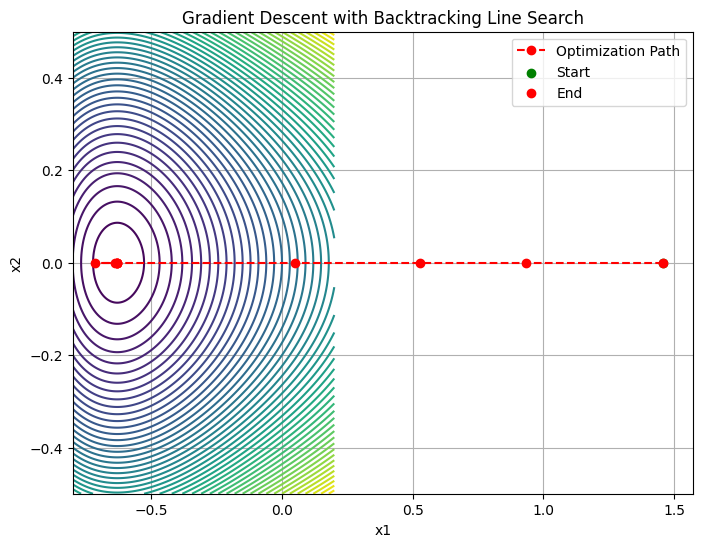

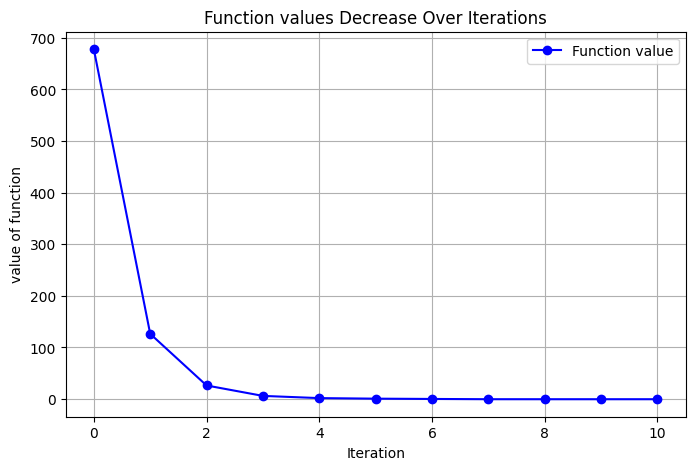

In [16]:
x1, x2 = sp.symbols('x1 x2')
f = x1 + 3*x2**2 + x1**4
x0 = [5.0, 4.0]
history, grad_norms = Backtrack_Newton_Method(f, [x1, x2], x0, s=1.0, alpha=0.4, beta=0.8, epsilon=1e-7)
plot_optimization_path(history[3:], f, [x1, x2])
plot_function_values(grad_norms)

#### **<span style="color:rgb(0, 255, 255);">[part f]</span>**


| Method                        | Final Point \( x^* \)      | \( f(x^*) \)         | Iterations |
|------------------------------|-----------------------------|----------------------|------------|
| Gradient Method              | [-6.29960525e-01  1.01420591e-08]        | small                | 9 |
| Newton's Method              | [-0.62996052  0.]          | small                | 22 |



Advantages and Disadvantages

| Aspect                | Gradient Descent                          | Newton's Method                               |
|-----------------------|--------------------------------------------|-----------------------------------------------|
| **Convergence Speed** | Slow (especially near optimum)            | Fast (quadratic convergence near minimum)     |
| **Stability**         | More stable with backtracking              | Unstable without line search (may overshoot)  |
| **Implementation**    | Simple                                     | Requires computing and inverting Hessian      |
| **Cost per Iteration**| Low (just gradient)                        | High (gradient + Hessian + matrix solve)      |
| **Global Behavior**   | Good global behavior                       | May diverge if far from optimum               |


**3. Can We Combine the Two?**

Yes, we can combine gradient descent and Newton's method to get the best of both:
if Hessian Matrix is positive definite, we use Newton method and if is not, we use gradient method.


### **<span style="color:rgb(0, 255, 0);">[Problem 2]</span>**

#### **<span style="color:rgb(0, 255, 255);">[part a]</span>**

we have:
$$ L(\theta) = \sum_{i=1}^{n} \frac{1}{n} \left( f(x_i, \theta) - y_i \right)^2
             = \frac{1}{n} \sum_{i=1}^{n} \left( f(x_i, \theta) - y_i \right)^2 $$

and we can rewrite $ f(x_i, \theta) $ as below:
$$  f(x_i, \theta) = \theta_0 + \theta_1x_i + \theta_2x_i^2 = 
\begin{bmatrix}
1 & x_i & x_i^2
\end{bmatrix}
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2
\end{bmatrix} = X_i^T\theta
$$

so we have:
$$ L(\theta) = \frac{1}{n} \sum_{i=1}^{n} \left( f(x_i, \theta) - y_i \right)^2
= \frac{1}{n} \sum_{i=1}^{n} \left( X_i\theta - y_i \right)^2 = \frac{1}{n} ||X\theta-Y||^2$$

so the minimizing $L(\theta)$ problem becomes in the form of:
$$
\frac{1}{n} \min_{\theta} ||X\theta-Y||^2
$$
which
$ 
\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2
\end{bmatrix}
$

#### **<span style="color:rgb(0, 255, 255);">[part b]</span>**

this function however, is a quadratic function. so we have:

$$
\min_{\theta} ||X\theta-Y||^2 = (X\theta-Y)^T(X\theta-Y) = \theta^TX^TX\theta -2Y^TX\theta + ||Y||^2
$$

Now, since $x$ and $y$ were given, we can find $X$ and $Y$:
$$
x = \begin{bmatrix}
-2 & -1.5 & -1 & 0 & 1 & 2
\end{bmatrix} \rightarrow 
X = \begin{bmatrix}
1 & -2 & 4 \\
1 & -1.5 & 2.25 \\
1 & -1 & 1 \\
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & 2 & 4
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
8.3 & 5 & 2 & 0.3 & 2.5 & 8
\end{bmatrix} \rightarrow
Y = \begin{bmatrix}
8.3 \\
5 \\
2 \\
0.3 \\
2.5 \\
8
\end{bmatrix}
$$

so we can calculate gradien and hessian of $L(\theta)$:
$$
\nabla L(\theta) = \frac{2}{n}(X^TX\theta-X^TY)
$$
$$
\nabla^2 L(\theta) = \frac{2}{n}X^TX = \frac{1}{3}\begin{bmatrix}
6 & -1.5 & 12.25 \\
-1.5 & 11.25 & -6 \\
12.25 & -6 & 42.8125
\end{bmatrix}
$$


#### **<span style="color:rgb(0, 255, 255);">[part c]</span>**

here, we define $x, y, f(x_i,\theta), L(\theta) $:

In [17]:
x = np.array(np.array([-2, -1.5, -1, 0, 1, 2],dtype=float))
y = np.array([8.3, 5, 2.0, 0.3, 2.5, 8],dtype=float)

def f(x, theta):
    return theta[0] + theta[1] * x + theta[2] * x**2

def L(theta):
    return np.mean((f(x,theta)-y)**2)

we use the contents in part a and b to find gradient and hessian...

In [18]:
def gradient(x,theta,y):
    X = np.vstack([np.ones_like(x), x, x**2]).T
    return (2/len(x))*(X.T@(X @ theta - y))

def hessian(x):
    X = np.vstack([np.ones_like(x), x, x**2]).T
    return (2/len(x))*(X.T@X)

In [19]:
hessian(x)

array([[ 2.        , -0.5       ,  4.08333333],
       [-0.5       ,  4.08333333, -1.125     ],
       [ 4.08333333, -1.125     , 13.02083333]])

Now, since we have a quadratic function as objective function, we use exact line search for gradient method. it is proven in the page 61 of the textbook that for quadratic function we have:
$$
t_k = \frac{||\nabla f(x_k)||^2}{2\nabla f(x_k)^T A \nabla f(x_k)} = \frac{||\nabla L(\theta_k)||^2}{2\nabla L(\theta_k)^T X^TX \nabla L(\theta_k)} = 
 \frac{||\nabla L(\theta_k)||^2}{n\nabla L(\theta_k)^T \nabla^2 L(\theta_k) \nabla L(\theta_k)}
$$
so...

In [20]:
def Gradient_Exact_Method(theta0, x ,y, epsilon, max_iteration,Print=True):
    n = len(x)
    theta = theta0.copy()
    history = []
    Hx = hessian(x)

    for iter in range(1,max_iteration+1):
        history.append(theta.copy())
        grad = gradient(x,theta,y)
        grad_norm = np.linalg.norm(grad)
        if Print:
            print(f"Iteration {iter}: theta = {theta}, L(theta) = {L(theta)}, norm = {grad_norm}")
        if grad_norm < epsilon:
            break
        t = (grad**2)/(n*(grad.T @ Hx @ grad))
        theta -= (t*grad)

    return np.array(history), theta


Now, we run the gradient method for the problem

In [21]:
theta = np.zeros(3)
h_gem, s_gem = Gradient_Exact_Method(theta,x,y,1e-5,1000)

Iteration 1: theta = [0. 0. 0.], L(theta) = 28.038333333333338, norm = 28.464153870360445
Iteration 2: theta = [ 9.33961828e-03 -2.30594201e-04  2.78649433e-01], L(theta) = 20.9538960393789, norm = 24.606372180065925
Iteration 3: theta = [ 1.74857029e-02 -4.36621425e-04  5.19224390e-01], L(theta) = 15.667503481789836, norm = 21.275381941828556
Iteration 4: theta = [ 2.46014998e-02 -6.21584041e-04  7.26924334e-01], L(theta) = 11.722257777569261, norm = 18.399250536671314
Iteration 5: theta = [ 3.08280284e-02 -7.88531712e-04  9.06238697e-01], L(theta) = 8.77743770659786, norm = 15.915869107433966
Iteration 6: theta = [ 3.62871269e-02 -9.40127615e-04  1.06104384e+00], L(theta) = 6.57894772917322, norm = 13.77161112127699
Iteration 7: theta = [ 4.10840825e-02 -1.07870643e-03  1.19468678e+00], L(theta) = 4.937285104355281, norm = 11.920174121369772
Iteration 8: theta = [ 4.53099047e-02 -1.20632539e-03  1.31005746e+00], L(theta) = 3.7111122203944635, norm = 10.321579649616575
Iteration 9: th

#### **<span style="color:rgb(0, 255, 255);">[part d]</span>**

Here, we implement Pure Newton method, because it solves the quadratic functions in one step

In [22]:
def Newton_Exact_Method(theta0, x ,y, epsilon, max_iteration,Print=True):
    n = len(x)
    theta = theta0.copy()
    history = []
    Hx = hessian(x)

    for iter in range(1,max_iteration+1):
        history.append(theta.copy())
        grad = gradient(x,theta,y)
        grad_norm = np.linalg.norm(grad)
        if Print:
            print(f"Iteration {iter}: theta = {theta}, L(theta) = {L(theta)}, norm = {grad_norm}")
        if grad_norm < epsilon:
            break
        
        d = np.linalg.solve(Hx,grad)
        #t = (d.T@grad)/(n*(d.T @ Hx @ d))
        t = 1
        theta -= (t*d)

    return np.array(history), theta


In [23]:
theta = np.zeros(3)
h_nem, s_nem = Newton_Exact_Method(theta,x,y,1e-10,1000)

Iteration 1: theta = [0. 0. 0.], L(theta) = 28.038333333333338, norm = 28.464153870360445
Iteration 2: theta = [ 0.32291068 -0.03874453  1.96770768], L(theta) = 0.036939308765355, norm = 1.8914564400730272e-15


#### **<span style="color:rgb(0, 255, 255);">[part e]</span>**

we know from chapter 3 that this problem has solution in form of:
$$ \theta^* = [X^TX]^{-1}X^TY $$
so we calculate it here...

In [24]:
X = np.vstack([np.ones_like(x), x, x**2]).T
theta_hat = np.linalg.solve(X.T@X,X.T@y)
theta_hat

array([ 0.32291068, -0.03874453,  1.96770768])

so both algorithm must converges to $\theta^*$. as we can see both does. so both algorithms work. here we see a few comparison...

In [25]:
print("GD final loss:", L(s_gem))
print("Newton final loss:", L(s_nem))

if L(s_nem)>L(s_gem):
    print("Newton is better!")
else:
    print("Gradient is better!")

GD final loss: 0.036939308830147045
Newton final loss: 0.036939308765355
Gradient is better!


here we can see the fitted curves and loss over iterations...

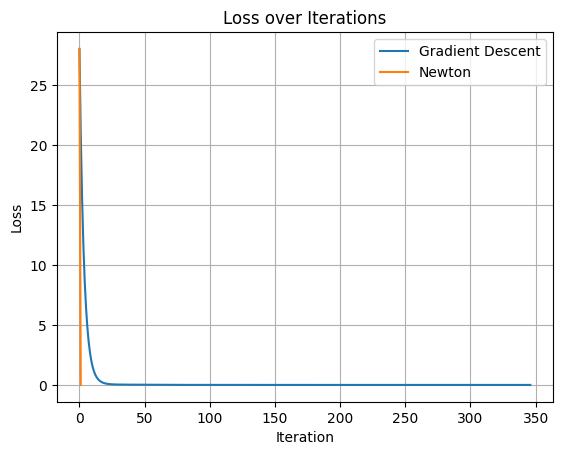

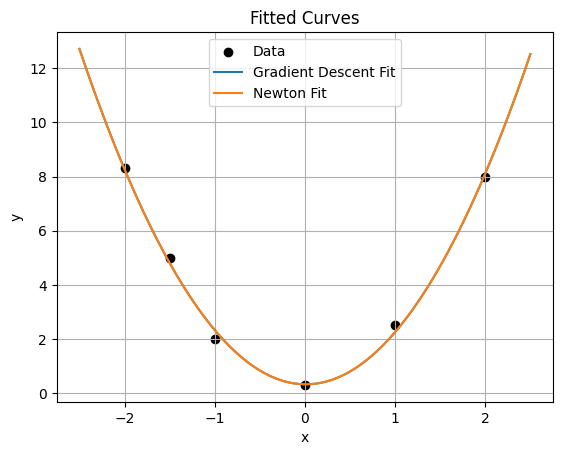

In [26]:
# Loss history
gd_losses = [L(theta) for theta in h_gem]
nt_losses = [L(theta) for theta in h_nem]
plt.plot(gd_losses, label='Gradient Descent')
plt.plot(nt_losses, label='Newton')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Plot fitted polynomial
x_fit = np.linspace(-2.5, 2.5, 100)
X_fit = np.vstack([np.ones_like(x_fit), x_fit, x_fit**2]).T
y_gd_fit = X_fit @ s_gem
y_nt_fit = X_fit @ s_nem

plt.scatter(x, y, color='black', label='Data')
plt.plot(x_fit, y_gd_fit, label='Gradient Descent Fit', linestyle='-')
plt.plot(x_fit, y_nt_fit, label='Newton Fit', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Curves')
plt.legend()
plt.grid(True)
plt.show()

at this graph, we can see that newton method converges very quickly and faster than gradient method.

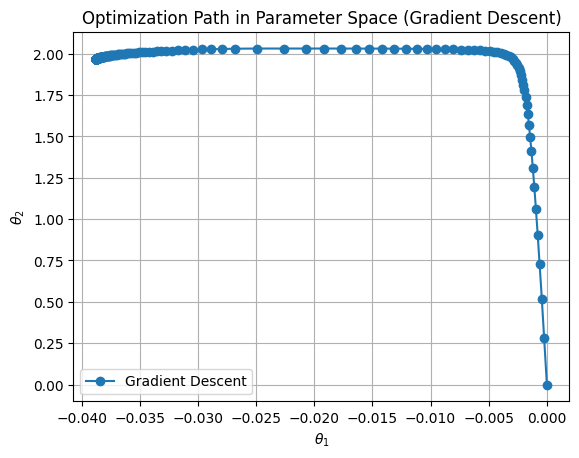

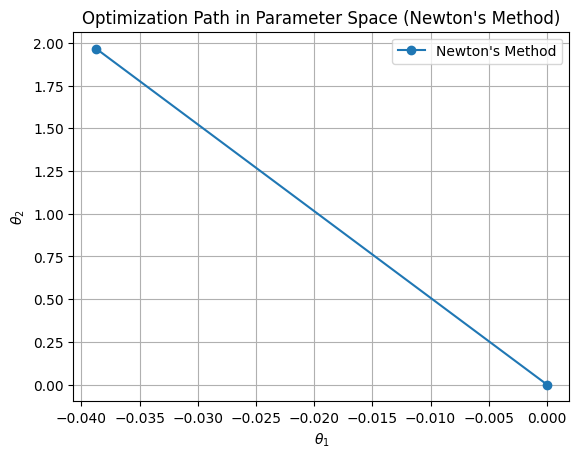

In [27]:
def plot_optimization_path(history, method_name='Gradient Descent'):
    theta1_vals = history[:, 1]  # θ₁ (linear term)
    theta2_vals = history[:, 2]  # θ₂ (quadratic term)

    plt.plot(theta1_vals, theta2_vals, marker='o', linestyle='-', label=method_name)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.title(f'Optimization Path in Parameter Space ({method_name})')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot both
plot_optimization_path(h_gem, 'Gradient Descent')
plot_optimization_path(h_nem, 'Newton\'s Method')

#### **<span style="color:rgb(0, 255, 255);">[part f]</span>**

In [28]:
for it in range(10):
    t0 = np.array([np.random.uniform(low=-10000,high=10000) for i in range(3)],dtype=float)
    _, s_g = Gradient_Exact_Method(t0,x,y,1e-5,1000,Print=False)
    _, s_n = Newton_Exact_Method(t0,x,y,1e-5,1000,Print=False)
    print("sample ", it+1 ,": ",t0)
    print("GD final loss:", L(s_g),s_g)
    print("Newton final loss:", L(s_n),s_n)

    if L(s_nem)>L(s_gem):
        print("Newton is better!")
    else:
        print("Gradient is better!")

sample  1 :  [-6374.28993889   193.18715149  9993.7227464 ]
GD final loss: 0.03693930882783399 [ 0.32289768 -0.03874576  1.96771206]
Newton final loss: 0.036939308765355 [ 0.32291068 -0.03874453  1.96770768]
Gradient is better!
sample  2 :  [-4320.30344814  7435.66628546  5312.01055342]
GD final loss: 0.03693930883042817 [ 0.32289742 -0.03874579  1.96771214]
Newton final loss: 0.03693930876535499 [ 0.32291068 -0.03874453  1.96770768]
Gradient is better!
sample  3 :  [3229.2543087  3218.17746239 9558.72986211]
GD final loss: 0.03693930882903133 [ 0.3229238  -0.0387433   1.96770327]
Newton final loss: 0.036939308765355 [ 0.32291068 -0.03874453  1.96770768]
Gradient is better!
sample  4 :  [-5175.75140333  5193.76861791 -3027.16988329]
GD final loss: 0.03693930882987421 [ 0.32289747 -0.03874578  1.96771213]
Newton final loss: 0.036939308765355 [ 0.32291068 -0.03874453  1.96770768]
Gradient is better!
sample  5 :  [ 6847.18342827 -7010.99385695  8547.26055718]
GD final loss: 0.036939308828

as we can see, there is no difference that where we start, in every random point, we achieve in same results.